In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [2]:
def westerhoff(T,e):
    ### Parameters ###
    #T = 5000
    a = 1
    b = 0.04 #0.04
    c = 0.04
    d = 0.975
    #e = 300
    sig_alpha = 0.01 
    sig_beta = 0.05
    sig_gamma = 0.01
    
    ### Preallocation ###
    # baseline parameter
    p = np.zeros(T)
    w_c = np.zeros(T)
    w_f = np.zeros(T)
    d_c = np.zeros(T)
    d_f = np.zeros(T)
    f = np.zeros(T)
    # random parameter
    alpha = np.random.normal(0,sig_alpha,T)
    beta = np.random.normal(0,sig_beta,T)
    gamma = np.random.normal(0,sig_gamma,T)
    # fitness function
    a_c = np.zeros(T)
    a_f = np.zeros(T)
    a_zero = np.zeros(T)
    # weights of the strategies
    w_c = np.zeros(T)
    w_c[0:2] = 1/3
    w_f = np.zeros(T)
    w_c[0:2] = 1/3
    w_zero = np.zeros(T)
    w_zero[0:2] = 1/3
    
    ### functions ###
    def atractivity(P_t,P_t1,D,A):
        return (np.exp(P_t)-np.exp(P_t1))*D+d*A
    
    def weights(A1,A2,A3):
        return np.exp(e*A1)/(np.exp(e*A1)+np.exp(e*A2)+np.exp(e*A3))
    
    
    for t in range(2,T-1):
        
        d_c[t] = b*(p[t]-p[t-1])+beta[t]
        d_f[t] = c*(f[t] - p[t]) + gamma[t]
        a_c[t] = atractivity(P_t=p[t], P_t1 = p[t-1], D=d_c[t-2], A=a_c[t-1])
        a_f[t] = atractivity(P_t=p[t], P_t1 = p[t-1], D=d_f[t-2], A=a_f[t-1])
        w_c[t] = weights(A1=a_c[t], A2= a_f[t], A3 = a_zero[t])
        w_f[t] = weights(A1=a_f[t], A2= a_c[t], A3 = a_zero[t])
        w_zero[t] = weights(A1=a_zero[t], A2= a_c[t], A3 = a_f[t])
        if t == 2000:
            p[t+1] = p[t] + a*(w_c[t]*d_c[t]+w_f[t]*d_f[t])+ 20*alpha[t]
        else:
            p[t+1] = p[t] + a*(w_c[t]*d_c[t]+w_f[t]*d_f[t])+ alpha[t]
    return(p)

In [8]:
plt.style.use('classic')

price = np.exp(westerhoff(5000,300))

r = np.zeros(len(price))
for t in range (3,len(price)):
    r[t] = np.log(price[t]) - np.log(price[t-1])

r_abs = np.abs(r[4:])

r_mean = r[4:].mean()
r_var = r[4:].var()

pseudo_r = np.random.normal(r_mean,np.sqrt(r_var), len(price)*1000)


C:\Users\phill\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\phill\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


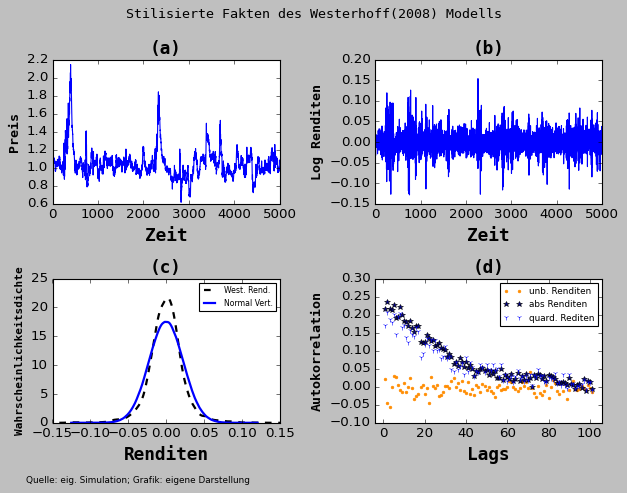

In [13]:
font = {'family': 'monospace',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }
fig, ([ax0,ax1],[ax2,ax3]) = plt.subplots(2,2)
fig.suptitle('Stilisierte Fakten des Westerhoff(2008) Modells',fontdict = font)
ax0.plot(price,color='blue',linewidth=1)
ax0.set_title('(a)', fontdict=font)
ax0.set_xlabel('Zeit', fontdict=font)
ax0.set_ylabel('Preis', fontdict=font,fontsize = 12)

ax1.plot(r[4:], color = 'blue')
ax1.set_title('(b)',fontdict=font)
ax1.set_xlabel('Zeit',fontdict=font)
ax1.set_ylabel('Log Renditen',fontdict=font,fontsize = 12)


sns.distplot(r[4:],hist = False, kde = True, kde_kws = {'linewidth': 2,'linestyle':'--'},ax=ax2, label='West. Rend.', color='black')
sns.distplot(pseudo_r,hist = False, kde = True, kde_kws = {'linewidth': 2},ax=ax2, label = 'Normal Vert.', color = 'blue')
ax2.set_xlabel("Renditen", fontdict= font)
ax2.set_ylabel('Wahrscheinlichkeitsdichte', fontdict = font, fontsize = 10) 
ax2.set_title('(c)', fontdict = font) 
ax2.set_xlim([-0.15,0.15])
ax2.legend(loc=1, prop={'size':7})
plt.tight_layout()



sm.graphics.tsa.plot_acf(r[4:], lags=101, ax= ax3,use_vlines= False, alpha = None ,zero = False ,color = 'darkorange' ,marker = '.', label = 'unb. Renditen')
sm.graphics.tsa.plot_acf(r_abs[4:], lags=101, ax= ax3, use_vlines = False , alpha = None , zero = False, color='darkblue', marker = '*', label = 'abs Renditen')
sm.graphics.tsa.plot_acf(r_abs**2, lags=101, ax= ax3, use_vlines = False , alpha = None , zero = False, color='blue', marker = '1', label = 'quard. Rediten')
ax3.set_ylim((-0.1,0.3))
ax3.set_xlabel('Lags', fontdict = font)
ax3.set_ylabel('Autokorrelation', fontdict = font,fontsize = 12)
ax3.set_title('(d)', fontdict = font)
ax3.legend(loc=1, prop={'size':8})

plt.tight_layout()
plt.figtext(0.4, -0.01, "Quelle: eig. Simulation; Grafik: eigene Darstellung", ha="right", fontsize=8)
plt.savefig('Westerhoff_Figure.jpeg', bbox_inches = 'tight')